## 作業目標
    
了解數學式與利用超參數調整求導梯度下降的過程

## 作業重點

dfunc 是 func 偏微分的公式，x ^ 2 偏微分等於 2x，可以同時改變 func、dfunc 內容

調整其它的超參數 init_w、epochs、learning_rate、decay、momentum 測試逼近的過程

## 參考資料

[Gradient descent using python and numpy - stackoverflow](https://stackoverflow.com/questions/17784587/gradient-descent-using-python-and-numpy)

[梯度下降算法的参数更新公式](https://blog.csdn.net/hrkxhll/article/details/80395033)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 目標函數: y = (x + 5) ^ 2
def func(x): 
    return np.square(x + 5)

# 目標函數的一階導函數: dy/dx = 2 * (x + 5)
def dfunc(x):
    return 2 * (x + 5)

## 梯度下降法

In [3]:
def gradient_descent_iterator(init_x=4, epochs=20, learning_rate=0.3):
    prev_x, iters = init_x, {}
    for i in range(epochs):
        next_x = prev_x - learning_rate * dfunc(prev_x)
        prev_x, iters[i] = next_x, prev_x
    return np.array(list(iters.items()))

def gradient_descent_plot(x, w, learning_rate):
    plt.figure('Gradient Descent', (8, 5,))
    plt.plot(x, func(x), c='b')
    plt.scatter(w, func(w), c='r', label='lr={}'.format(learning_rate))
    plt.legend()
    plt.show()

In [4]:
x = np.arange(-6.0, 6.0, 0.01)
iters = gradient_descent_iterator()
iters

array([[ 0.        ,  4.        ],
       [ 1.        , -1.4       ],
       [ 2.        , -3.56      ],
       [ 3.        , -4.424     ],
       [ 4.        , -4.7696    ],
       [ 5.        , -4.90784   ],
       [ 6.        , -4.963136  ],
       [ 7.        , -4.9852544 ],
       [ 8.        , -4.99410176],
       [ 9.        , -4.9976407 ],
       [10.        , -4.99905628],
       [11.        , -4.99962251],
       [12.        , -4.99984901],
       [13.        , -4.9999396 ],
       [14.        , -4.99997584],
       [15.        , -4.99999034],
       [16.        , -4.99999613],
       [17.        , -4.99999845],
       [18.        , -4.99999938],
       [19.        , -4.99999975]])

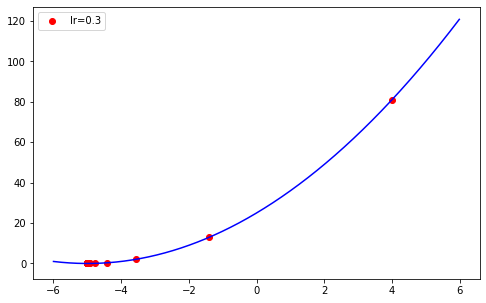

In [5]:
gradient_descent_plot(x, iters[:, 1], 0.3)

## 學習率對梯度下降法的影響

In [6]:
class GradientDescentResult:

    def __init__(self, color, learning_rate):
        self.color, self.learning_rate = color, learning_rate
        self.iters = gradient_descent_iterator(learning_rate=learning_rate)

def gradient_descent_iterator(init_x=4, epochs=20, learning_rate=0.01):
    prev_x, iters = init_x, {}
    for i in range(epochs):
        next_x = prev_x - learning_rate * dfunc(prev_x)
        prev_x, iters[i] = next_x, prev_x
    return np.array(list(iters.items()))

def gradient_descent_plots(x, results):
    fig = plt.figure('Gradient Descent: Learning Rate', (12, 4,))
    for i, result in enumerate(results):
        gradient_descent_plot(x, result.iters[:, 1], fig, i, result.color, result.learning_rate)
    plt.show()

def gradient_descent_plot(x, w, fig, i, c, learning_rate):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.plot(x, func(x), c='b')
    ax.scatter(w, func(w), c=c, label='lr={}'.format(learning_rate))
    ax.legend()

In [7]:
x = np.linspace(-5, 5, 100)
results = [GradientDescentResult(color, learning_rate) for color, learning_rate in [['r', 0.1], ['g', 0.01], ['y', 0.001]]]
results

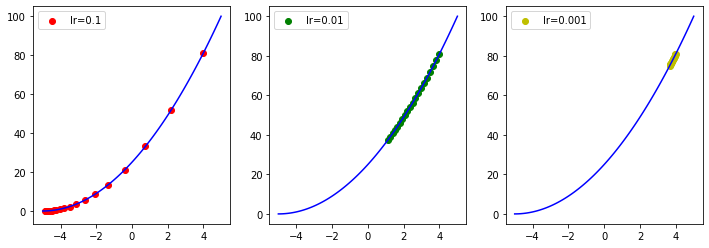

In [8]:
gradient_descent_plots(x, results)

## 學習率衰減公式

In [9]:
class GradientDescentResult:

    def __init__(self, decay):
        self.decay = decay
        self.iters = gradient_descent_iterator(decay=decay)

def gradient_descent_iterator(epochs=300, decay=0.0, learning_rate=1.0):
    return np.array([(i, learning_rate / (1.0 + decay * i),) for i in range(epochs)])

def gradient_descent_plots(results):
    plt.figure('Gradient Descent: Decay', (8, 5,))
    for result in results:
        gradient_descent_plot(result.iters[:, 0], result.iters[:, 1], result.decay)
    plt.ylim([0, 1.1])
    plt.legend(loc='best')
    plt.show()

def gradient_descent_plot(i, lr, decay):
    plt.plot(i, lr, label='dc={}'.format(decay))

In [10]:
results = [GradientDescentResult(decay) for decay in [0.0, 0.001, 0.1, 0.5, 0.9, 0.99]]
results

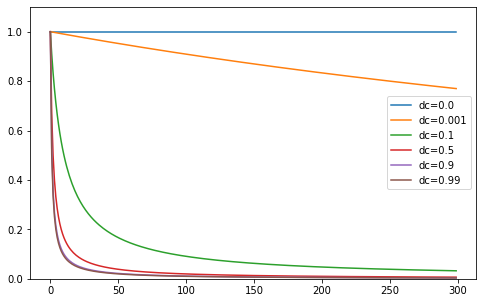

In [11]:
gradient_descent_plots(results)

## Momentum (動量)

In [12]:
class GradientDescentResult:

    def __init__(self, color, momentum, learning_rate):
        self.color, self.momentum, self.learning_rate = color, momentum, learning_rate
        self.iters = gradient_descent_iterator(momentum=momentum, learning_rate=learning_rate)

def gradient_descent_iterator(init_x=4, epochs=10, momentum=0.0, learning_rate=0.01):
    prev_x, curr_v, iters = init_x, 0.0, {}
    for i in range(epochs):
        curr_v = momentum * curr_v - learning_rate * dfunc(prev_x)
        next_x = prev_x + curr_v
        prev_x, iters[i] = next_x, prev_x
    return np.array(list(iters.items()))

def gradient_descent_plots(x, results):
    fig = plt.figure('Gradient Descent: Momentum', (16, 16,))
    for i, result in enumerate(results):
        gradient_descent_plot(x, result.iters[:, 1], fig, i, result.color, result.momentum, result.learning_rate)
    plt.show()

def gradient_descent_plot(x, w, fig, i, c, momentum, learning_rate):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.plot(x, func(x), c='b')
    ax.scatter(w, func(w), c=c, label='lr={}, mo={}'.format(learning_rate, momentum))
    ax.set_xlim([-10, 5])
    ax.legend(loc=0)

In [13]:
x = np.linspace(-8, 5, 100)
results = []
for color, learning_rate in [['k', 0.01], ['r', 0.1], ['g', 0.6], ['y', 0.9]]:
    results.extend([GradientDescentResult(color, momentum, learning_rate) for momentum in [0.0, 0.1, 0.5, 0.9]])
results

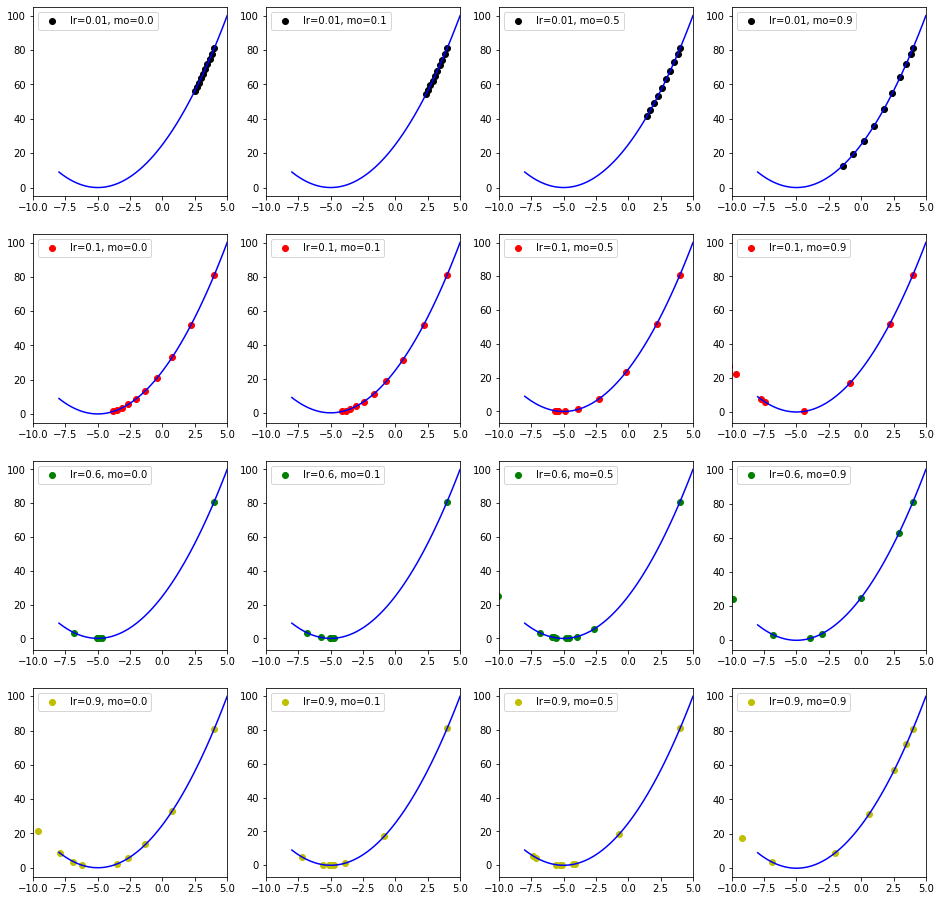

In [14]:
gradient_descent_plots(x, results)